<div align="center">
    <span style="font-size:30px">
        <strong>
            <!-- Símbolo de Python -->
            <img
                src="https://cdn3.emoji.gg/emojis/1887_python.png"
                style="margin-bottom:-5px"
                width="30px" 
                height="30px"
            >
            <!-- Título -->
            Python para Geólogos
            <!-- Versión -->
            <img 
                src="https://img.shields.io/github/release/kevinalexandr19/manual-python-geologia.svg?style=flat&label=&color=blue"
                style="margin-bottom:-2px" 
                width="40px"
            >
        </strong>
    </span>
    <br>
    <span>
        <!-- Github del proyecto -->
        <a href="https://github.com/kevinalexandr19/manual-python-geologia" target="_blank">
            <img src="https://img.shields.io/github/stars/kevinalexandr19/manual-python-geologia.svg?style=social&label=Github Repo">
        </a>
        &nbsp;&nbsp;
        <!-- Licencia -->
        <img src="https://img.shields.io/github/license/kevinalexandr19/manual-python-geologia.svg?color=forestgreen">
        &nbsp;&nbsp;
        <!-- Release date -->
        <img src="https://img.shields.io/github/release-date/kevinalexandr19/manual-python-geologia?color=gold">
    </span>
    <br>
    <span>
        <!-- Perfil de LinkedIn -->
        <a target="_blank" href="https://www.linkedin.com/in/kevin-alexander-gomez/">
            <img src="https://img.shields.io/badge/-Kevin Alexander Gomez-5eba00?style=social&logo=linkedin">
        </a>
        &nbsp;&nbsp;
        <!-- Perfil de Github -->
        <a target="_blank" href="https://github.com/kevinalexandr19">
            <img src="https://img.shields.io/github/followers/kevinalexandr19.svg?style=social&label=kevinalexandr19&maxAge=2592000">
        </a>
    </span>
    <br>
</div>

***

<span style="color:lightgreen; font-size:25px">**PG101 - Fundamentos de Estadística**</span>

Bienvenido al curso!!!

Vamos a revisar las bases de la <span style="color:gold">estadística</span> usando ejemplos en Python. <br>
Es necesario que tengas un conocimiento previo en programación con Python y visualización de datos con Matplotlib.


<span style="color:gold; font-size:20px">**Bootstrap** </span>

***
- [¿Qué significa bootstrap?](#parte-1)
- [Generación de datos](#parte-2)
- [Cálculo de medidas estadísticas](#parte-3)
- [Visualización de la incertidumbre](#parte-4)
- [En conclusión...](#parte-5)

***

<a id="parte-1"></a>

### <span style="color:lightgreen">**¿Qué significa bootstrap?**
***

En estadística, el <span style="color:gold">bootstrap</span> o <span style="color:gold">remuestreo</span> es un método robusto que permite realizar inferencias sobre una población a partir de muestras pequeñas o de distribución desconocida. 

Si tenemos un conjuntos de datos, podemos realizar **bootstrap** para obtener un nuevo conjunto de datos que será extraído de manera aleatoria y con reemplazo a partir del conjunto original.

<center><img src="resources/bootstrap.png" width="800"/></center>

<br>
Este procedimiento estadístico permite simular las condiciones de muestreo original y calcular medidas como el error estándar, intervalos de confianza y pruebas de hipótesis.

Es importante tener en cuenta que este método no incrementa la cantidad de información en el conjunto de datos, solamente nos ayuda a <span style="color:lightgreen">obtener una mejor estimación acerca de la distribución de las estadísticas (media, varianza, etc.) de las muestras</span>.
***

<a id="parte-2"></a>

### <span style="color:lightgreen">**Generación de datos**
***
En este ejemplo, crearemos un conjunto pequeño de datos y aplicaremos bootstrap para estimar la distribución de la media y varianza de dicho conjunto.

In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Asumiremos que el conjunto tiene una distribución normal o gaussiana $N[0,1]$:

In [2]:
# Número de muestras en el conjunto original
n = 10
# Número de conjuntos a crear con bootstrap
m = 1000

# Generador aleatorio de datos
rng = np.random.default_rng()

# Conjunto original vacío (lleno de ceros)
data = np.zeros(n)

# Bucle que reemplaza el valor de cada celda (cero) con un valor aleatorio (rng)
for i in range(0, n):
    data[i] = rng.normal() 

Observamos el conjunto original de 10 datos:

In [3]:
# Conjunto de datos
print(data)

[ 1.23237603  0.13333742  1.10226988  0.09321209 -0.42587176  1.37044291
  0.32946606  0.84131521 -0.16325484 -0.40663884]


A partir de este conjunto original, tomaremos `n` muestras con reemplazo unas `m` veces:

In [4]:
# Conjunto de bootstrap vacío (lleno de ceros) de tamaño m x n
bootstrap = np.zeros((m, n)) 

# Bucle que reemplaza el valor de cada celda (cero) con una valor aleatorio del conjunto original
for i in range(0, m):
    for sample in range(0, n):
        bootstrap[i, sample] = np.random.choice(data)

print(f"El conjunto de remuestreo tiene un tamaño de {bootstrap.shape}")

El conjunto de remuestreo tiene un tamaño de (1000, 10)


En total, tenemos 1000 conjuntos de datos, cada uno de estos conjuntos contiene 10 muestras tomadas del conjunto original (con repetición).

Observamos los primeros 5 conjuntos generados:

In [5]:
for array in bootstrap[:5]:
    print(array)
    print("")

[ 1.23237603  0.09321209 -0.42587176  0.09321209 -0.42587176  0.13333742
 -0.40663884 -0.42587176  1.23237603  1.10226988]

[ 0.32946606 -0.16325484 -0.42587176  0.13333742  0.13333742  0.84131521
  0.09321209 -0.42587176  0.32946606  0.13333742]

[-0.40663884 -0.42587176 -0.16325484  0.84131521 -0.40663884 -0.40663884
  1.23237603  0.09321209  0.84131521 -0.42587176]

[ 0.09321209  0.13333742 -0.16325484  0.32946606 -0.16325484 -0.42587176
  0.09321209 -0.16325484  0.84131521  1.23237603]

[ 1.23237603 -0.16325484  0.13333742  1.37044291 -0.40663884  0.32946606
  1.37044291  0.84131521  0.32946606  1.23237603]



<a id="parte-3"></a>

### <span style="color:lightgreen">**Cálculo de medidas estadísticas**
***
Ahora que tenemos los 100 conjuntos de remuestreo, calcularemos los valores de media y varianza para cada uno de estos conjuntos:

In [6]:
# Conjuntos vacíos (llenos de ceros) en donde almacenaremos la media y varianza de cada remuestreo
media = np.zeros(m)
varianza = np.zeros(m)

# Bucle que reemplaza el valor de cada remuestreo (cero) con su respectiva media y varianza
for i in range(0, m):
    media[i] = np.mean(bootstrap[i, :])
    varianza[i] = np.var(bootstrap[i, :])

Observamos parte de los resultados:

In [7]:
# Media de los 10 primeros conjuntos
for mean in media[:10]:
    print(mean)

0.22025294408640414
0.09784733290704599
0.0773303682406828
0.1807282633072959
0.6269328959934845
0.6526521912798613
0.6050645665526025
0.6664066560117907
0.40385485560260725
0.8381102138155491


In [8]:
# Varianza de los 10 primeros conjuntos
for var in varianza[:10]:
    print(var)

0.45119979255567505
0.12805767926248318
0.3768712957672663
0.23049618355409648
0.3997973544976615
0.4478462570452525
0.48134220269954114
0.3509205087804653
0.3122689780373931
0.2822238903442535


<a id="parte-4"></a>

### <span style="color:lightgreen">**Visualización de la incertidumbre**
***
Ahora que tenemos la media y varianza de los conjuntos generados a través de bootstrap, crearemos histogramas para visualizar su distribución:

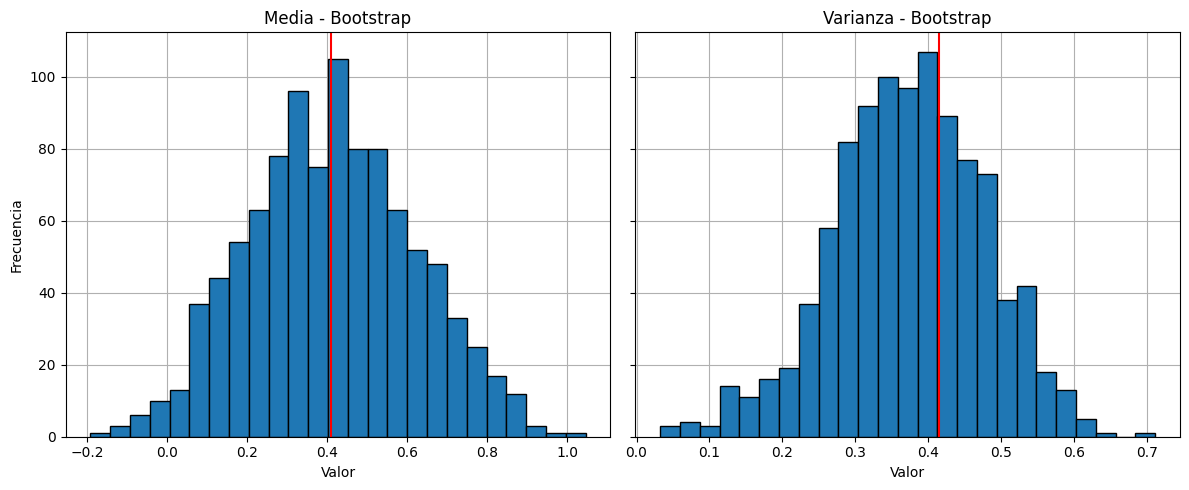

In [9]:
# Figura principal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Histograma de la media
ax1.hist(media, bins=25, edgecolor="black")
ax1.set_title("Media - Bootstrap")
ax1.set_xlabel("Valor")
ax1.set_ylabel("Frecuencia")
ax1.grid()
ax1.set_axisbelow(True)
ax1.axvline(data.mean(), c="red") # Media del conjunto original

# Histograma de la varianza
ax2.hist(varianza, bins=25, edgecolor="black")
ax2.set_title("Varianza - Bootstrap")
ax2.set_xlabel("Valor")
ax2.grid()
ax2.set_axisbelow(True)
ax2.axvline(data.var(), c="red") # Varianza del conjunto original

plt.tight_layout()

Por último, generaremos un resumen estadístico de los valores de media y varianza:

In [10]:
df = pd.DataFrame({"Media": media, "Varianza": varianza})
df.describe()

,Media,Varianza
count,1000.000000,1000.000000
mean,0.413158,0.372753
std,0.206658,0.104130
min,-0.191460,0.032349
25%,0.268986,0.304670
50%,0.409970,0.374599
75%,0.554393,0.443632
max,1.046285,0.710986


<a id="parte-5"></a>

### <span style="color:lightgreen">**En conclusión...**
***
    
- La incertidumbre disminuye rápidamente conforme aumentamos el número de muestras.

- Usando bootstrap, el valor de incertidumbre para la media se aproxima al error estándar.

- Este método nos permite encontrar valores de incertidumbre para cualquier medida estadística.

- El método de bootstrap no toma en cuenta el contexto espacial (e.g. ubicación de los datos, correlación espacial, etc.).

---